<a href="https://colab.research.google.com/github/sohil344/Data-Visualization/blob/main/Indian_Census_data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity



<h2>You are a team working under a Bio-Tech Startup going to launch its Home Checkup Service with Online Booking offering the following initial services.

1. Full Body Checkup with a Bio-Tech Device based on Blood Samples
2. Online Health Techs offering  i. Diabetes checkup device, ii. Blood Pressure checkup device, iii. Vitamins deficiency checkup device

 You have to analyse Medical Market in India with respect to the given problem statement using Segmentation analysis and come up with a  feasible strategy to enter the market, targeting the segments most likely to use their product in terms of Geographic, Demographic, Psychographic, Behavioral. (Interns have the choice to add more segments)
</h2>

In [4]:
data=pd.read_csv('/content/india-districts-census-2011.csv')
data.head(5)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [5]:
#Statstical Summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [6]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [7]:
#Checking null values
data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

There are No null values so carrying forward our analysis


In [8]:
data.shape

(640, 118)

In [9]:
#Dumping Unwanted column
data.columns.tolist()

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Househol

In [10]:
data.drop(['SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST', 'Workers', 'Male_Workers', 'Female_Workers', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
           'Buddhists', 'Jains', 'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households', 'Households_with_Bicycle', 'Households_with_Car_Jeep_Van',
           'Households_with_Radio_Transistor', 'Households_with_Scooter_Motorcycle_Moped', 'Married_couples_1_Households', 'Married_couples_2_Households',
           'Married_couples_3_Households', 'Married_couples_3_or_more_Households', 'Married_couples_4_Households', 'Married_couples_5__Households',
           'Married_couples_None_Households', 'Household_size_1_person_Households', 'Household_size_2_persons_Households', 'Household_size_1_to_2_persons',
           'Household_size_3_persons_Households', 'Household_size_3_to_5_persons_Households', 'Household_size_4_persons_Households', 'Household_size_5_persons_Households',
           'Household_size_6_8_persons_Households', 'Household_size_9_persons_and_above_Households', 'Location_of_drinking_water_source_Near_the_premises_Households',
           'Location_of_drinking_water_source_Within_the_premises_Households', 'Type_of_bathing_facility_Enclosure_without_roof_Households',
           'Type_of_fuel_used_for_cooking_Any_other_Households', 'Type_of_latrine_facility_Pit_latrine_Households', 'Type_of_latrine_facility_Other_latrine_Households',
           'Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households', 'Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households',
           'Not_having_bathing_facility_within_the_premises_Total_Households', 'Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households',
           'Main_source_of_drinking_water_Un_covered_well_Households', 'Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households', 'Main_source_of_drinking_water_Spring_Households',
           'Main_source_of_drinking_water_River_Canal_Households', 'Main_source_of_drinking_water_Other_sources_Households',
           'Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households', 'Location_of_drinking_water_source_Near_the_premises_Households',
           'Location_of_drinking_water_source_Within_the_premises_Households', 'Main_source_of_drinking_water_Tank_Pond_Lake_Households',
           'Main_source_of_drinking_water_Tapwater_Households', 'Main_source_of_drinking_water_Tubewell_Borehole_Households', 'Condition_of_occupied_census_houses_Dilapidated_Households',
           'Housholds_with_Electric_Lighting', 'Households_with_Computer', 'Ownership_Owned_Households', 'Ownership_Rented_Households'], axis=1, inplace=True)


In [11]:
data.shape

(640, 56)

In [12]:
data.columns.tolist()

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Households_with_Internet',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Households_with_Telephone_Mobile_Phone_Landline_only',
 'Households_with_Telephone_Mobile_Phone_Mobile_only',
 'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car',
 'Households_with_Television',
 'Households_with_Telephone_Mobile_Phone',
 'Households_with_Telephone_Mobile_Phone_Both',
 'Households_with_sep

In [13]:
data.drop(['Households_with_Telephone_Mobile_Phone_Landline_only',
 'Households_with_Telephone_Mobile_Phone_Mobile_only',
 'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car',
 'Households_with_Television',
 'Households_with_Telephone_Mobile_Phone','Having_bathing_facility_Total_Households',
 'Households_with_Telephone_Mobile_Phone_Both'],axis=1,inplace=True)

In [14]:
data.shape

(640, 49)

From 118 column is bring down to 49  columns, looking after the column header using domain knowledge we elimnated columns.

**Exploring Insights at state level**

There are many valuable varibles from the above list but for the starter let's select population and state columns

In [15]:
fig=px.histogram(data,x='State name',y='Population',title='Population Vs State wise ')
fig.update_layout(bargap=0.1)
fig.show()

So there are many states which can be selected for our start up to launch their services in solely based on population count.

Most likely more business will be generssated from states like :
<b>
* Rajasthan
* Uttarpradesh
* Bihar
* West Bengal
* Madhya Pradesh
* Gujarat
* Maharastra
* Andhar Pradesh
* Karnataka
* and Tamil Nadu
</b>

<u> Note </u>:- These are states with population greater than 50 Millions and this does not visualize whole scenario it is just a speculation based on Total population count of the above given states.

**Now lets explore number of literate people residing in every state as literacy rate is directly correlated by regular medical check ups**

In [16]:
fig=px.histogram(data,x='State name',y='Literate',title='Literate Population per State')
fig.update_layout(bargap=0.1)
fig.show()

So most of the state that we selected earlier based on population has adequet amount of literate people. But to select a few i would state:


*   Rajasthan(least literate population count)
*   Uttar Pradesh (Highest literate population count)
*   Bihar
*   West Bengal
*   Madhya Pradesh
*   Gujrat
*   Maharashtra
*   Andhra Pradesh
*   Karnataka
*   Tamil Nadu






**Our company provides servies on online appointment basis and basic need for that would be an internet connection so let's plot for that**

In [17]:
fig=px.histogram(data,
                 x='State name',
                 y='Households_with_Internet',
                 title='Households with Internet in every state')
fig.show()

From above fig it is evident that most internet users is in Maharashtra but lets make a list of states which have households with internet over 0.5Millions or close to this base limit



*   NCT of Delhi
*   Uttar Prades
*   Maharashtra
*   Andhra Pradesh
*   Karnataka
*   Kerala
*   Tamil Nadu



### **Exploring for Insights at District Level**

In [18]:
NCT_of_Delhi=data[data['State name']=='NCT OF DELHI']
Uttar_Prades=data[data['State name']=='UTTAR PRADESH']
West_Bengal=data[data['State name']=='WEST BENGAL']
Gujrat=data[data['State name']=='GUJRAT']
Maharashtra=data[data['State name']=='MAHARASHTRA']
Andhra_Pradesh=data[data['State name']=='ANDHRA PRADESH']
Karnataka=data[data['State name']=='KARNATAKA']
Kerala=data[data['State name']=='KERALA']
Tamil_Nadu=data[data['State name']=='TAMIL NADU']

In [19]:
Maharashtra

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Main_Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
496,497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,512099,394410,664193,...,449,1399,144,210,354,207,224,431,0,2446
497,498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,723388,570528,825875,...,794,1927,208,305,513,372,478,850,0,3583
498,499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,1629223,1262659,1643955,...,1790,4183,471,687,1158,847,1122,1969,65,7988
499,500,MAHARASHTRA,Buldana,2586258,1337560,1248698,1879874,1048892,830982,1107542,...,910,2441,262,383,645,430,499,929,0,4421
500,501,MAHARASHTRA,Akola,1813906,932334,881572,1411281,758977,652304,691025,...,871,1930,255,372,627,442,679,1121,0,3948
501,502,MAHARASHTRA,Washim,1197160,620302,576858,869917,487703,382214,502755,...,387,1101,115,167,282,181,188,369,0,1942
502,503,MAHARASHTRA,Amravati,2888445,1480768,1407677,2251875,1207104,1044771,1061544,...,1512,3195,369,540,909,692,1036,1728,0,6236
503,504,MAHARASHTRA,Wardha,1300774,668385,632389,1019458,552617,466841,529623,...,711,1510,141,207,348,276,334,610,99,2754
504,505,MAHARASHTRA,Nagpur,4653570,2384975,2268595,3673808,1959220,1714588,1654778,...,3484,5637,1071,1134,2205,1575,1780,3355,2385,14073
505,506,MAHARASHTRA,Bhandara,1200334,605520,594814,899860,488709,411151,413838,...,579,1327,105,152,257,209,167,376,102,2237


It will be a very tedious task to write code for each and every state vise dataframes that we made recently. So we are going to define a function for that purpose.

In [20]:
def Explore_districts_of(state):
  fig=px.histogram(state,x='District name',
                   marginal='box',y='Population',title='District wise Population')
  fig.update_layout(bargap=0.1)
  fig.show()

  fig=px.histogram(state,marginal='box',
                   x='District name',
                   y='Literate',
                  title='Number of Literate Vs Districts'
                   )
  fig.update_layout(bargap=0.1)
  fig.show()

  fig=px.histogram(state,marginal='box',
                   x='District name',
                   y='Households_with_Internet',
                   title='Households with Internet in every District')
  fig.show()


In [21]:
Explore_districts_of(Uttar_Prades)

## **Karnataka**

In [22]:
Explore_districts_of(Karnataka)

In [23]:
Explore_districts_of(Tamil_Nadu)

In [24]:
Explore_districts_of(Maharashtra)

In [25]:
Explore_districts_of(NCT_of_Delhi)

## **Gathering Insights for few selected States**
As per the district wise analysis we can see clearly that as per population,literacy rate, internet in household is well placed at this 4 states : Uttar Prades, Tamil Nadu, Karnataka, Maharashtra. So we selected this states

In [26]:
Selected_states=pd.concat([Uttar_Prades,Maharashtra,Tamil_Nadu,Karnataka]) #COncated all dataframes

In [27]:
Selected_states

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Main_Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
131,132,UTTAR PRADESH,Saharanpur,3466382,1834106,1632276,2077108,1220114,856994,882701,...,974,2349,251,332,583,223,138,361,125,4029
132,133,UTTAR PRADESH,Muzaffarnagar,4143512,2193434,1950078,2417339,1448528,968811,1085491,...,1114,2813,316,416,732,234,173,407,149,4871
133,134,UTTAR PRADESH,Bijnor,3682713,1921215,1761498,2135393,1241471,893922,839778,...,930,2481,289,381,670,187,142,329,109,4310
134,135,UTTAR PRADESH,Moradabad,4772006,2503186,2268820,2263848,1357435,906413,1104968,...,1250,3125,357,464,821,253,226,479,198,5452
135,136,UTTAR PRADESH,Rampur,2335819,1223889,1111930,1043666,630408,413258,564266,...,474,1439,186,239,425,82,92,174,48,2545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,KARNATAKA,Yadgir,1174271,590329,583942,510003,306751,203252,437241,...,563,1257,184,124,308,174,242,416,112,2440
580,581,KARNATAKA,Kolar,1536401,776396,760005,1016219,564110,452109,584590,...,799,1806,206,193,399,271,394,665,41,3389
581,582,KARNATAKA,Chikkaballapura,1255104,636437,618667,783222,442158,341064,535565,...,121,250,30,19,49,27,43,70,39,471
582,583,KARNATAKA,Bangalore Rural,990923,509172,481751,688749,385311,303438,389989,...,368,748,113,59,172,83,135,218,120,1422


In [28]:
fig= px.treemap(
    Selected_states,path=['State name','District name'],
    values='Population',
    color='Households_with_Internet',
    color_continuous_scale='RdBu',
    title='Finding out best Market')

fig.update_layout(bargap=1,autosize=False,width=800,height=800)
fig.show()


In [29]:
 fig= px.sunburst(
    Selected_states,path=['State name','District name'],
    values='Population',
    color='Households_with_Internet',
    color_continuous_scale='RdBu',
    title='Finding out best Market')

fig.update_layout(bargap=1,autosize=False,width=800,height=800)
fig.show()

### <I> larger the portion of district in above visuals shows larger total population and color inclination towards darker shades of blue means larger number of households with internet connection</I>

#### So it seems there are five districts that looks like promising greater business opportunity for us. especially three of which are in Maharashtra.

<font size = 3>
<br>

* Our company should encorrporate some advance data collection methods like foccus groups and mass public surveys to this states and specially to the states corresponding to five districts that show great promise of business gains.public surveys can be conducted online too by giving out incentives or discounts to customers that take part in it. By doing so we are also finalizing our customer base by marketing and also collecting data that can be used to create pyschographic profiles of the participants which will give us enough understanding of the local community, their values and their attitude towards online health services.


* This type of data collection needs to be done at a large scale to get rid of bias which is a very dangerous for our analysis.


* My personal judgement leans towards Maharashtran market as this state has more districts that are attractivve for our profits but also has quality population which has internet services and higher literacy rates.

    
* Marketing department should first penetrate larger cities which has denser population because more the density of population faster will be the word of mouth marketing like a wildfire spreading across dense forest.

    
* After establishing concrete business there we should move towards cities with lesser public and then towards the rural areas as rural segment is very hard to deal with for many reasons like providing fast customer service is very challenging, inventory storage in near by areas is very costly and also possibility of people adopting this change of online healthcare services is very less to allocate our resources to.


In [30]:
Selected_states.drop(['Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000','Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate','Female_Literate','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education'], axis=1, inplace= True)


In [31]:
Selected_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 131 to 583
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   District code                                                 168 non-null    int64 
 1   State name                                                    168 non-null    object
 2   District name                                                 168 non-null    object
 3   Population                                                    168 non-null    int64 
 4   Male                                                          168 non-null    int64 
 5   Female                                                        168 non-null    int64 
 6   Literate                                                      168 non-null    int64 
 7   Households_with_Internet                                      168 non-null    

In [32]:
Selected_states.drop(['Households_with_separate_kitchen_Cooking_inside_house','Having_latrine_facility_within_the_premises_Total_Households',
                      'Location_of_drinking_water_source_Away_Households'],axis=1,inplace=True)

In [33]:
Selected_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 131 to 583
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             168 non-null    int64 
 1   State name                168 non-null    object
 2   District name             168 non-null    object
 3   Population                168 non-null    int64 
 4   Male                      168 non-null    int64 
 5   Female                    168 non-null    int64 
 6   Literate                  168 non-null    int64 
 7   Households_with_Internet  168 non-null    int64 
 8   Rural_Households          168 non-null    int64 
 9   Urban_Households          168 non-null    int64 
 10  Households                168 non-null    int64 
 11  Age_Group_0_29            168 non-null    int64 
 12  Age_Group_30_49           168 non-null    int64 
 13  Age_Group_50              168 non-null    int64 
 14  Age not stated          

In [34]:
Selected_states.corr()

<ipython-input-34-d8a476f3ef60>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,District code,Population,Male,Female,Literate,Households_with_Internet,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.121331,-0.141542,-0.098584,0.038961,0.159186,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
Population,-0.121331,1.000000,0.999066,0.998844,0.969780,0.731503,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.999066,1.000000,0.995832,0.966991,0.734823,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.998844,0.995832,1.000000,0.970752,0.726202,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,0.969780,0.966991,0.970752,1.000000,0.826475,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,0.731503,0.734823,0.726202,0.826475,1.000000,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Rural_Households,-0.204762,0.567404,0.554203,0.580840,0.440882,-0.051928,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247
Urban_Households,0.209499,0.794356,0.797215,0.789432,0.887783,0.958281,0.022659,1.000000,0.906913,0.708097,0.894129,0.825743,0.217719
Households,0.101705,0.951945,0.948948,0.953189,0.982464,0.838044,0.441759,0.906913,1.000000,0.892256,0.989566,0.965997,0.361519
Age_Group_0_29,-0.260047,0.984909,0.986749,0.980700,0.918900,0.652522,0.609443,0.708097,0.892256,1.000000,0.919295,0.884922,0.580226


<ipython-input-35-9239393da7ac>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

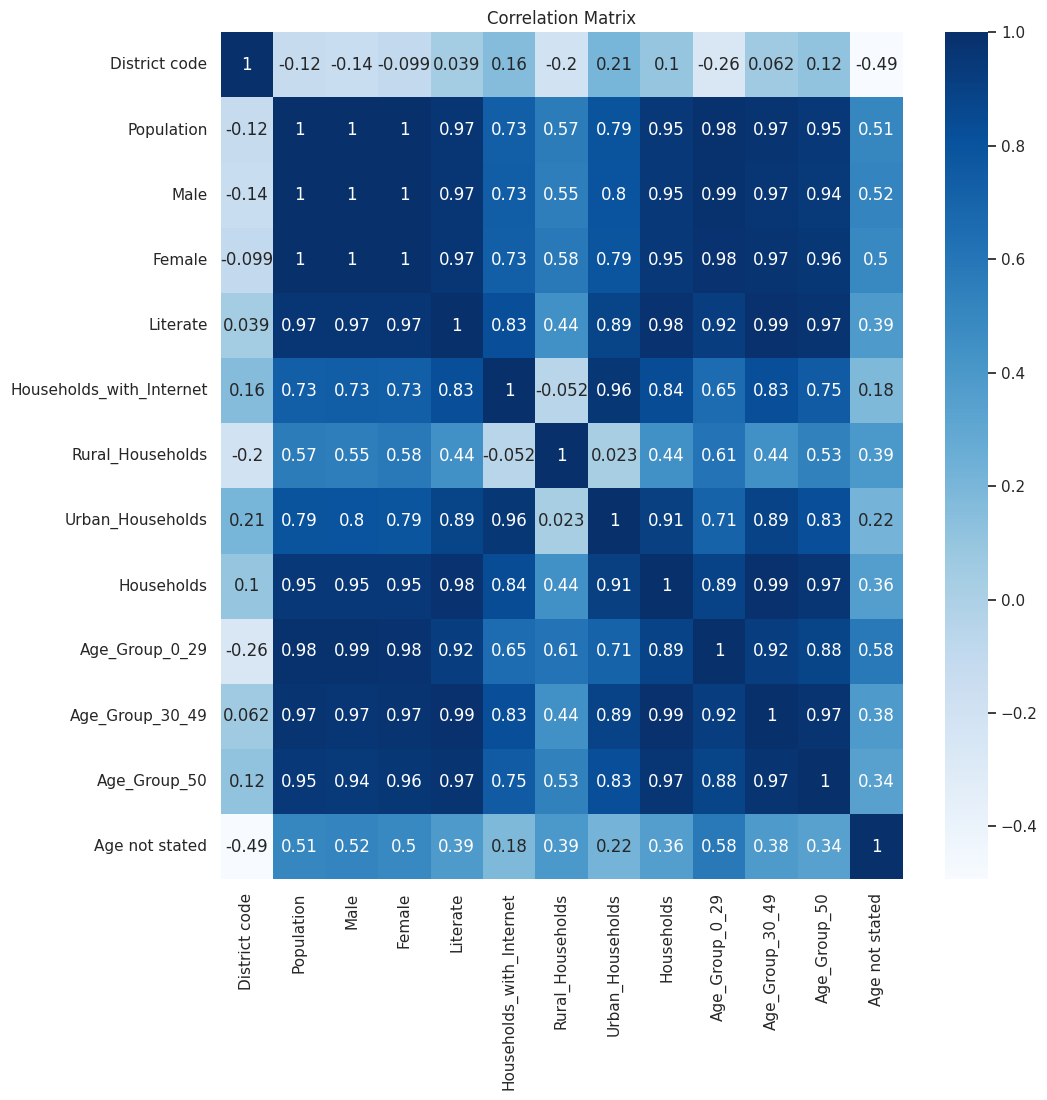

In [35]:
plt.figure(figsize=(11,11))
sns.heatmap(Selected_states.corr(),cmap='Blues',annot=True)
plt.title("Correlation Matrix")

In [36]:
#Label Encoder for the State & District names
LB=LabelEncoder()
Selected_states['State name']=LB.fit_transform(Selected_states['State name'])
Selected_states['District name']=LB.fit_transform(Selected_states['District name'])

In [37]:
advance_data=Selected_states

In [38]:
scaler=StandardScaler()
segmented_std=scaler.fit_transform(advance_data)
segmented_std=pd.DataFrame(segmented_std,columns=advance_data.columns)

In [39]:
segmented_std

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,-1.324692,0.992915,0.938211,0.504293,0.547092,0.455580,0.300132,-0.189428,0.761676,0.035085,0.352473,0.734211,0.219546,0.012682,1.132291
1,-1.319693,0.992915,0.484570,0.923266,0.968877,0.870508,0.583607,-0.182633,1.088909,0.061826,0.514374,1.204868,0.533253,0.449547,0.164387
2,-1.314694,0.992915,-1.144411,0.638147,0.649342,0.624294,0.348694,-0.232497,1.137181,-0.098101,0.391205,0.921050,0.256180,0.077265,1.532896
3,-1.309694,0.992915,0.422710,1.312147,1.332468,1.286663,0.455720,-0.153639,1.177799,0.194800,0.671162,1.732297,0.703201,0.375527,4.081044
4,-1.304695,0.992915,0.896971,-0.195243,-0.169189,-0.223794,-0.560915,-0.294619,-0.231057,-0.280352,-0.348951,0.041012,-0.396375,-0.679479,-0.166240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.914989,-1.613486,1.701151,-0.913950,-0.912871,-0.913144,-1.005554,-0.338425,-1.131721,-0.477325,-0.905270,-0.848820,-0.891510,-1.038428,-0.654702
164,0.919988,-1.613486,0.051550,-0.689882,-0.694462,-0.683273,-0.583783,-0.272977,-0.565648,-0.262838,-0.474241,-0.739355,-0.555089,-0.618840,-0.608545
165,0.924987,-1.613486,-0.979451,-0.863935,-0.858748,-0.867807,-0.777912,-0.315740,-0.617681,-0.390386,-0.610625,-0.925303,-0.707827,-0.766713,-0.597510
166,0.929986,-1.613486,-1.350611,-1.027397,-1.008134,-1.046567,-0.856626,-0.296741,-1.020846,-0.387349,-0.777804,-1.064127,-0.867342,-1.007185,-0.627645


In [40]:
advance_data.corr()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.795655,0.203548,-0.121331,-0.141542,-0.098584,0.038961,0.159186,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
State name,-0.795655,1.000000,-0.027725,0.092411,0.104025,0.079290,-0.031222,-0.145091,0.163939,-0.161085,-0.075464,0.188273,-0.039677,-0.068558,0.391986
District name,0.203548,-0.027725,1.000000,-0.029396,-0.035803,-0.022206,0.012210,0.003727,-0.011346,0.058343,0.047573,-0.069565,0.022360,0.038497,-0.098979
Population,-0.121331,0.092411,-0.029396,1.000000,0.999066,0.998844,0.969780,0.731503,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.104025,-0.035803,0.999066,1.000000,0.995832,0.966991,0.734823,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.079290,-0.022206,0.998844,0.995832,1.000000,0.970752,0.726202,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,-0.031222,0.012210,0.969780,0.966991,0.970752,1.000000,0.826475,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,-0.145091,0.003727,0.731503,0.734823,0.726202,0.826475,1.000000,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Rural_Households,-0.204762,0.163939,-0.011346,0.567404,0.554203,0.580840,0.440882,-0.051928,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247
Urban_Households,0.209499,-0.161085,0.058343,0.794356,0.797215,0.789432,0.887783,0.958281,0.022659,1.000000,0.906913,0.708097,0.894129,0.825743,0.217719


Text(0.5, 1.0, 'Correlation Matrix')

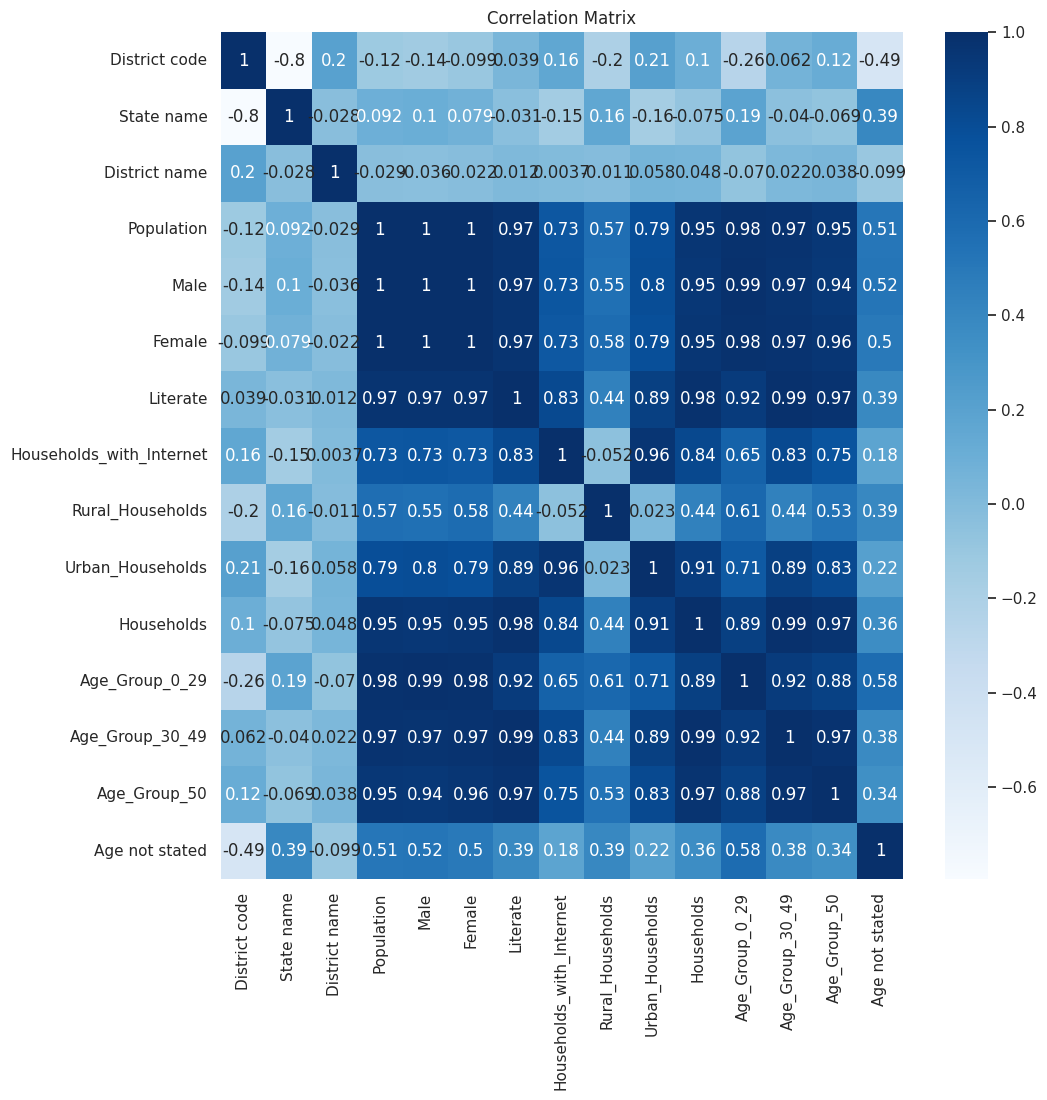

In [41]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(),cmap='Blues',annot=True)
plt.title("Correlation Matrix")

Working on columns having high correlation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

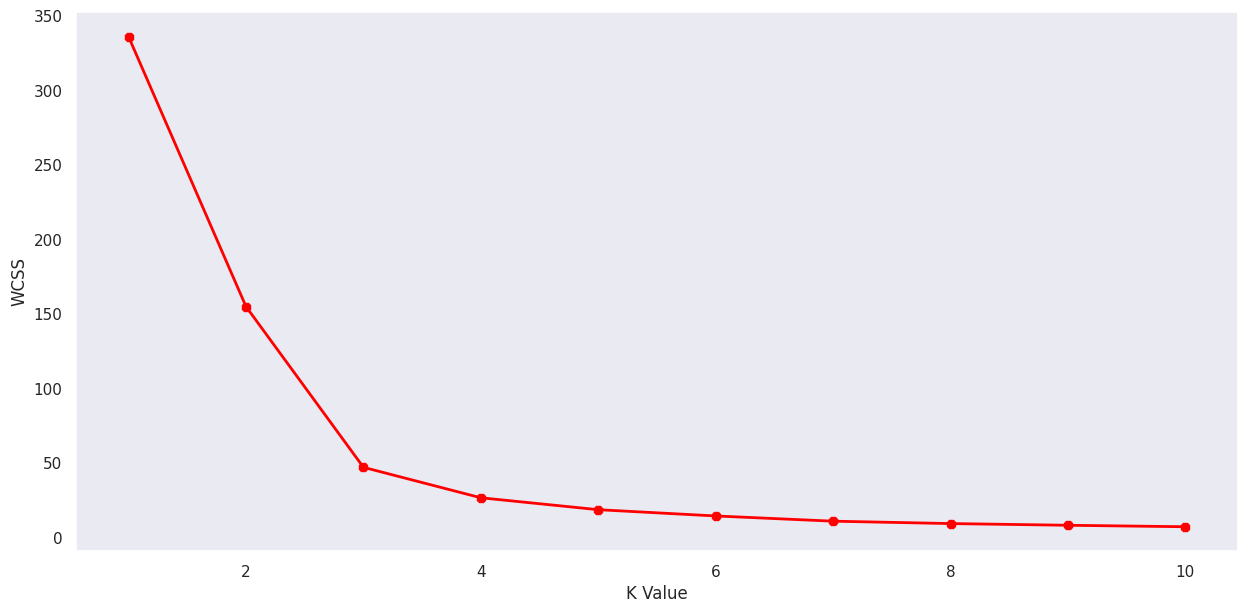

In [42]:
X1=segmented_std.loc[:,['Population','Literate']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X1)
print(label)

[1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 2 2 1 1 2 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
print(kmeans.cluster_centers_)

[[-0.56327527 -0.51218995]
 [ 0.72152495  0.59677741]
 [ 4.46468283  4.91976113]]


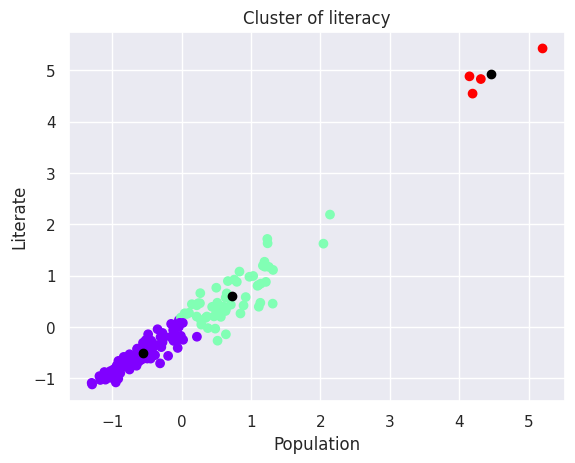

In [45]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of literacy')
plt.xlabel("Population")
plt.ylabel("Literate")
plt.show()

In [46]:
X1=segmented_std.loc[:,['Households_with_Internet','Literate']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

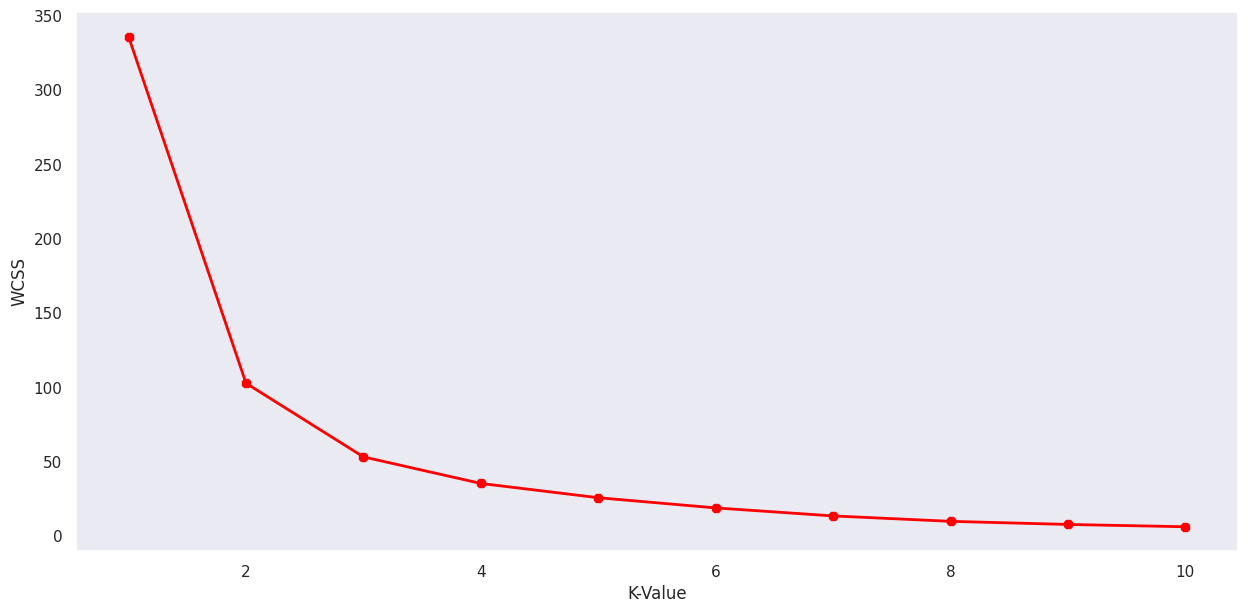

In [47]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K-Value')
plt.ylabel("WCSS")
plt.show()

In [48]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit(X1)
print(label)

KMeans(n_clusters=3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [49]:
print(kmeans.cluster_centers_)

[[-0.27097743 -0.51980044]
 [ 5.18770938  4.27897896]
 [ 0.04886071  0.5912974 ]]


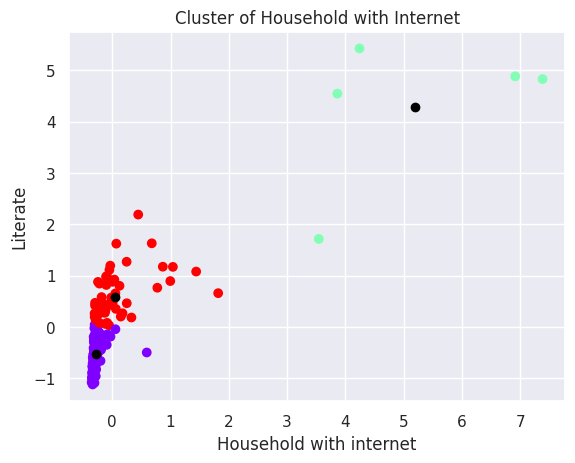

In [51]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("Cluster of Household with Internet")
plt.xlabel("Household with internet")
plt.ylabel("Literate")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

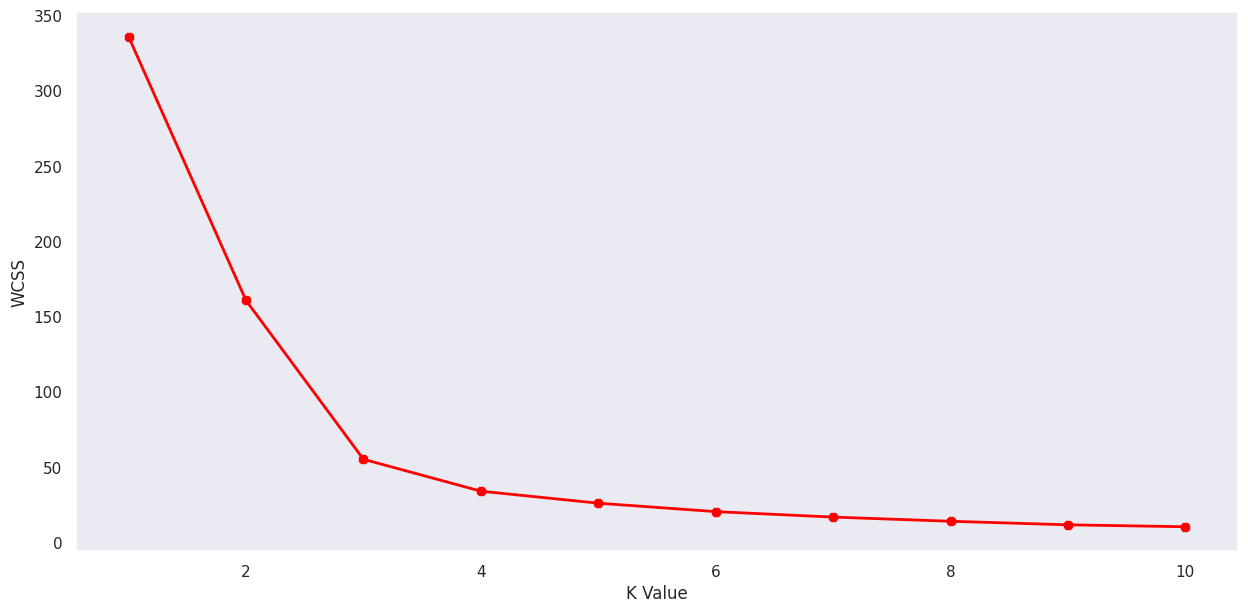

In [53]:
X1=segmented_std.loc[:,['Age_Group_0_29','Literate']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel("WCSS")
plt.show()

In [54]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[1 0 0 0 1 3 1 3 0 3 1 0 3 1 0 1 3 1 0 3 1 0 0 0 1 0 1 3 3 3 3 3 0 3 3 3 3
 3 3 3 1 1 3 0 1 1 1 0 1 3 3 1 1 1 3 1 0 1 1 0 1 1 0 0 3 0 3 1 3 3 3 3 3 0
 1 3 3 1 3 0 3 3 3 3 1 1 3 3 3 0 0 2 2 1 1 2 0 1 1 3 0 1 3 3 0 1 0 0 0 0 1
 1 1 3 3 3 3 3 1 3 3 1 3 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 0 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 1 2 3 3 3 3 1 3 1 3 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



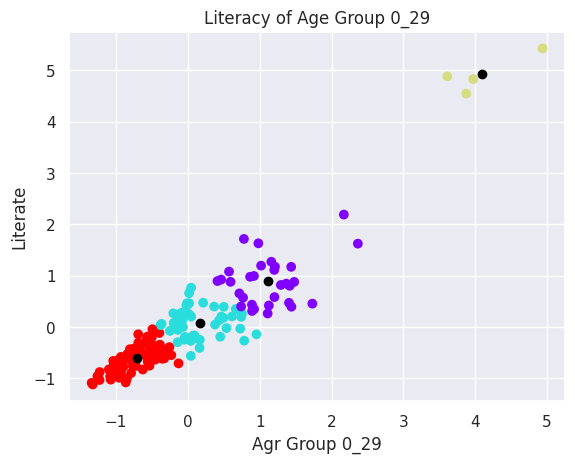

In [55]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("Literacy of Age Group 0_29")
plt.xlabel("Agr Group 0_29")
plt.ylabel("Literate")
plt.show()

In [56]:
segmented_std.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Households_with_Internet', 'Rural_Households',
       'Urban_Households', 'Households', 'Age_Group_0_29', 'Age_Group_30_49',
       'Age_Group_50', 'Age not stated'],
      dtype='object')

In [58]:
x=Selected_states[['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Households_with_Internet', 'Rural_Households',
       'Urban_Households', 'Households', 'Age_Group_0_29', 'Age_Group_30_49',
       'Age_Group_50']]
km=KMeans(n_clusters=15,init='k-means++',max_iter=300,n_init=10,random_state=0)
km.fit(x)
labels=km.labels_
centroids=km.cluster_centers_

In [61]:
segmented_std['labels']=labels
import plotly.express as px

# Assuming segmentation_std['labels'] contains the cluster labels obtained from K-means

fig = px.scatter_3d(segmented_std,
                    x='Age_Group_30_49',
                    y='State name',
                    z='Population',
                    color='labels',  # Color points based on cluster labels
                    size_max=10,
                    opacity=0.8,
                    title='Population in States',
                    labels={'Age_Group_30_49': 'Age Group 30-49', 'State name': 'State Name', 'Population': 'Population'},

                    )

fig.show()
